In [157]:
from networkx.generators.random_graphs import erdos_renyi_graph
import numpy as np
from scipy.optimize import fsolve
from random import sample
import math

In [110]:
from collections import defaultdict

class Graph:
    
    def __init__(self,n):
        self.vert=n
        self.g=defaultdict(list)
        self.component=[]
        
    def addEdge(self,x,y):
        self.g[x].append(y);
        self.g[y].append(x);
        
    def maindfs(self, v, visited,c):
        visited.add(v)
        
        for neighbor in self.g[v]:
            if neighbor not in visited:
                
                #print("here")
                c=self.maindfs(neighbor,visited,c)+1
        return c
                
        
    def dfs(self):
        
        visited=set()
        for v in range(self.vert):
            if v not in visited:
                c=1
                c=self.maindfs(v,visited,c)
                #print(c)
                self.component.append(c)
                
                

In [203]:
from collections import defaultdict
class Node:
    def __init__(self,dis,num):
        self.dis=dis
        self.num=num
        
    
class Graph2:
    
    def __init__(self,n):
        self.vert=n
        self.g=defaultdict(list)
        self.component=[]
        
    def addEdge(self,x,y):
        self.g[x].append(y);
        self.g[y].append(x);
        
    
                
        
    def bfs(self,s):
        
        visited=set()
        s.dis=0
        queue = [] 
        queue.append(s) 
        visited.add(s)
        while queue: 
            s = queue.pop(0) 
            
            #print (s.num," ",s.dis, " ",end = " ") 
            for i in self.g[s]: 
                if i not in visited: 
                    queue.append(i) 
                    i.dis=s.dis+1
                    visited.add(i)
        #print (s.num," ",s.dis, " ",end = " ") 
        return (s.dis/2)


In [143]:

def g(S,*z1):
    z=z1
    #print(z)
    return 1-np.exp(-S*z)-S



array([0.58281164])

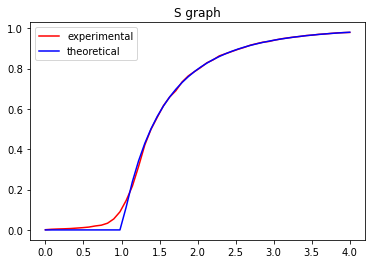

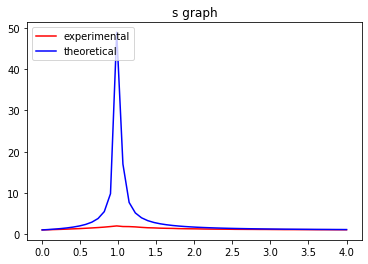

In [156]:
import networkx as nx
import matplotlib.pyplot as plt 
import numpy as np
import statistics
S=[]
s=[]
S_theor=[]
s_theor=[]
for z in np.linspace(0.0, 4.0, num=50):
    n = 1000
    p = z/(n-1)
    Scomp=[]
    scomp=[]
    S_root=fsolve(g,1.0,args=z)
    S_theor.append(S_root)
    s_theor.append(1/(1+(z*S_root)-z))
    for _ in range(100):
        
        g1 = erdos_renyi_graph(n, p)
        G=Graph(n)
        for u,v in g1.edges:
            G.addEdge(u,v)
            G.addEdge(v,u)
        G.dfs()
        mx=max(G.component)
        #print("he")
        if z<1:
            scomp.append(statistics.mean(G.component))
        else:
            scomp.append((sum(G.component)-mx)/(len(G.component)-1))
        Scomp.append(mx)
    #print(comp)
    S.append(statistics.mean(Scomp)/n)
    s.append(statistics.mean(scomp))
        #print(g1.edges())
        #nx.draw(g1)
#print(s)   
#print(s_theor)
plt.figure()
plt.title("S graph")
plt.plot(np.linspace(0.0, 4.0, num=50),S,'r',label="experimental")
plt.plot(np.linspace(0.0, 4.0, num=50),S_theor,'b',label="theoretical")
plt.legend(loc="upper left")
plt.figure()
plt.title("s graph")
plt.plot(np.linspace(0.0, 4.0, num=50),s,'r',label="experimental")
plt.plot(np.linspace(0.0, 4.0, num=50),s_theor,'b',label="theoretical")
plt.legend(loc="upper left")

[4.984423459244535, 5.505798192771084, 6.095917602996256, 6.495513364976272]
[5.0, 5.5, 6.0, 6.5]


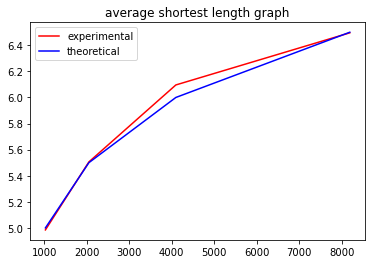

In [256]:
z=4
d=[]
d_theor=[]
for q in [10,11,12,13]:
    n=math.pow(2,q)
    p=z/(n-1)
    n=int(n)
    d_theor.append(np.log10(n)/np.log10(z))
    g = erdos_renyi_graph(n, p)
    dis=0
    randomSeed=sample(range(n),100)
    #nx.draw(g,with_labels = True)
    for r in randomSeed:
        G=Graph2(n)
        node=[]
        for x in range(n):
            node.append(Node(math.inf,x))
        for u,v in g.edges:
            G.addEdge(node[u],node[v])
            G.addEdge(node[v],node[u])
        #print(list(G.g))
        G.bfs(node[r])
        
        dis_list=[]
        for nod in node:
            if nod.dis!=math.inf and nod.dis>0:
                dis_list.append(nod.dis)
        
        if not dis_list:
            dis_list=[0]
        dis=dis+statistics.mean(dis_list)
    d.append(dis/100)
print(d)
print(d_theor)
n_list=[]
for p in [10,11,12,13]:
    n_list.append(math.pow(2,p))
plt.figure()
plt.title("average shortest length graph")
plt.plot(n_list,d,'r',label="experimental")
plt.plot(n_list,d_theor,'b',label="theoretical")
plt.legend(loc="upper left")

0   1   1
0   2   1
0   3   1
0   4   2
0   5   1
1   0   1
1   2   0
1   3   0
1   4   1
1   5   0
2   0   1
2   1   0
2   3   0
2   4   1
2   5   0
3   0   1
3   1   0
3   2   0
3   4   1
3   5   0
4   0   2
4   1   1
4   2   1
4   3   1
4   5   1
5   0   1
5   1   0
5   2   0
5   3   0
5   4   1
0.6666666666666666
1.5333333333333334


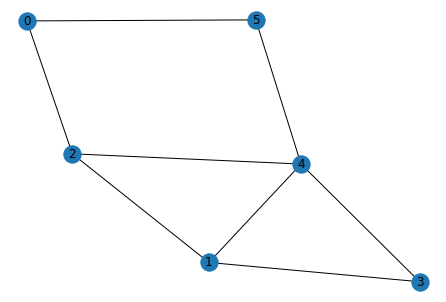

In [236]:
from collections import defaultdict
import random
random.seed(4089630)
class Node:
    def __init__(self,dis,num):
        self.dis=dis
        self.num=num
        
    
class Graph2:
    
    def __init__(self,n):
        self.vert=n
        self.g=defaultdict(list)
        self.component=[]
        
    def addEdge(self,x,y):
        self.g[x].append(y);
        self.g[y].append(x);
        
    
                
        
    def bfs(self,s):
        
        visited=set()
        s.dis=0
        queue = [] 
        queue.append(s) 
        visited.add(s)
        while queue: 
            s = queue.pop(0) 
            
            #print (s.num," ",s.dis, " ",end = " ") 
            for i in self.g[s]: 
                if i not in visited: 
                    queue.append(i) 
                    i.dis=s.dis+1
                    visited.add(i)
        #print (s.num," ",s.dis, " ",end = " ") 
        
n=6
p=0.5
g=erdos_renyi_graph(n, p)
nx.draw(g, with_labels=True)
G=Graph2(n)
node=[]
for x in range(n):
    node.append(Node(math.inf,x))
for u,v in g.edges:
    G.addEdge(node[u],node[v])
    G.addEdge(node[v],node[u])
G.bfs(node[4])

dis=0
for x in range(n):
    for y in range(n):
        if x!=y:
            print(x," ",y," ",abs(node[x].dis-node[y].dis))
            dis=dis+abs(node[x].dis-node[y].dis)
            
print(dis/(n*(n-1)))
print(nx.average_shortest_path_length(g))